<a href="https://colab.research.google.com/github/Gakori/FootballPredictions/blob/master/Supervised_Learning_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1) RESEARCH QUESTION

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below:

1. A prediction result of a game between team 1 and team 2, based on who's home and who's away, 

2. Whether or not the game is friendly (include rank in your training)

**Approach 1: Polynomial approach**

What to train given:

Rank of home team
Rank of away team
Tournament type

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

**Approach 2: Logistic approach**

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

## Metric for success

prediction of home and away goals

## Recording experimental design 

i) Business understanding

ii) Loading the data

iii) polynomial / logistic approach

iv) Conclusion and challanging the solution

### 2) Loading the data

In [477]:
#import all the necessary libraries

import pandas as pd
import numpy as np

#for viz
%matplotlib inline
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt

#modelling
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [478]:
#loading the fifa ranking dataset
#reviewing the first 5 columns
#checking the shape of the dataset

fifa = pd.read_csv('fifa_ranking.csv')
print(fifa.shape)
fifa.head()

(57793, 16)


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,08/08/1993
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,08/08/1993
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,08/08/1993
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,08/08/1993
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,08/08/1993


*the dataset contains 57793 rows and 16 columns*

In [479]:
#loading the results dataset
#reviewing the first 5 columns
#checking the shape of the dataset

results = pd.read_csv('results.csv')
print(results.shape)
results.head()

(40839, 9)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


*the dataset contains 40839 rows and 9 columns*

In [480]:
#info of fifa ranking
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [397]:
#info of result ranking
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [481]:
#fifa datatypes

fifa.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

*the dataset contains integers, objects and floats*

*the rank date should be in datetime instead of an object*

In [399]:
#results datatypes

results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

*neutral is a boolean, homescore and awayscore are integers, the rest are objects, some should be categorical eg country*

*date should be in datetime*

In [400]:
#describing the fifa ranking to display stat summaries

fifa.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [297]:
#describing the results ranking to display stat summaries

results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [298]:
#reviewing fifa and results columns

print(fifa.columns)
print('******************************')
print(results.columns)

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')
******************************
Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')


### 3) Data cleaning

In [299]:
#checking for null values in fifa dataset

fifa.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

*the dataset does not contain any null values*

In [300]:
#checking for null values in results dataset

results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

*the data does not contain any null values*

In [401]:
#changing date into datime in both fifa and results datasets

fifa.rank_date = pd.to_datetime(fifa.rank_date)
results.date = pd.to_datetime(results.date)

#reviewing the dtypes

print(fifa.dtypes)
print(results.dtypes)

rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object
date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object


*the dates are in the datetime format*

In [482]:
#checking for duplicates in fifa
fifa.duplicated()

duplicated_values = fifa[fifa.duplicated()]
len(duplicated_values)

37

*there are 37 duplicated values in fifa dataset*

In [483]:
#dropping the duplicates

fifa.drop_duplicates(keep=False, inplace=True)

fifa.duplicated()

duplicated_values = fifa[fifa.duplicated()]
len(duplicated_values)

0

In [484]:
#checking for duplicates in results
results.duplicated()

duplicated_values = results[results.duplicated()]
len(duplicated_values)

0

*no duplicates*

In [485]:
#changing dtypes to categorical

for column in ['country', 'home_team', 'away_team', 'tournament', 'city']:
  results[column] = results[column].astype('category')
#previewing the dtypes
results.dtypes

date            object
home_team     category
away_team     category
home_score       int64
away_score       int64
tournament    category
city          category
country       category
neutral           bool
dtype: object

In [486]:
#changing country column to categorical datype
##using a for loop to iterate over the categorical columns

for column in ['country_full']:
  fifa[column] = fifa[column].astype('category')
#previewing the dtypes
fifa.dtypes

rank                          int64
country_full               category
country_abrv                 object
total_points                float64
previous_points               int64
rank_change                   int64
cur_year_avg                float64
cur_year_avg_weighted       float64
last_year_avg               float64
last_year_avg_weighted      float64
two_year_ago_avg            float64
two_year_ago_weighted       float64
three_year_ago_avg          float64
three_year_ago_weighted     float64
confederation                object
rank_date                    object
dtype: object

In [308]:
#viewing date when first rank happened-fifa
fifa['rank_date'].min()

Timestamp('1993-08-08 00:00:00')

*the first rank was in 1993-08-08*

In [310]:
#viewing date when first rank happened-fifa
results['date'].min()

Timestamp('1872-11-30 00:00:00')

*first result date was in 1872-11-30 but the data has to much the fifa one from 1993*

In [505]:
results.drop(results[results['date']<'1993-08-08'].sort_values(by ='date' ,ascending = False).index,inplace = True)
results.shape
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40775,30/06/2019,Burundi,Guinea,0,2,African Cup of Nations,Cairo,Egypt,True
40776,30/06/2019,Madagascar,Nigeria,2,0,African Cup of Nations,Alexandria,Egypt,True
40777,30/06/2019,Jamaica,Panama,1,0,Gold Cup,Philadelphia,United States,True
40778,30/06/2019,United States,Curacao,1,0,Gold Cup,Philadelphia,United States,False
40838,20/07/2019,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [509]:
#merging data
fifa.rename({'country_full':'country'}, axis=1, inplace=True)
df_merge=pd.merge(fifa, results, on='country')
df_merge.head()

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,08/08/1993,26/03/1911,Germany,Switzerland,6,2,Friendly,Stuttgart,False
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,08/08/1993,29/10/1911,Germany,Sweden,1,3,Friendly,Hamburg,False
2,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,08/08/1993,26/10/1913,Germany,Denmark,1,4,Friendly,Hamburg,False
3,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,08/08/1993,24/10/1920,Germany,Hungary,1,0,Friendly,Berlin,False
4,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,08/08/1993,26/03/1922,Germany,Switzerland,2,2,Friendly,Frankfurt am Main,False


### 4) EDA

In [487]:
#checking for outliers in reults dataset
#A prediction result of a game between team 1 and team 2, based on who's home and who's away

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
#tournament graph
sns.countplot(results['tournament'])  

In [411]:
world=results[results['tournament']=='FIFA World Cup qualification']
world

def gettournament(tournament):
  if tournament == 'Friendly':
    return 'Friendly match'
  elif tournament == 'FIFA World Cup qualification':
    return 'worldcup'
  else:
    return 'other'

gettournament('Friendly')

'Friendly match'

In [ ]:
#getting ranks

In [416]:
#dropping unnecessary columns
results.drop(['city', 'country', 'neutral'], axis=1, inplace=True)

In [417]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank
21003,1998-10-01,Malawi,Zambia,0,1,COSAFA Cup,89,23
21004,1998-10-01,Eswatini,Botswana,1,1,Friendly,-1,155
21005,1998-11-01,Burkina Faso,Mali,0,0,Friendly,72,54
21006,1998-11-01,Togo,Mozambique,1,2,Friendly,71,76
21007,1998-12-01,Lesotho,Botswana,0,0,Friendly,137,156


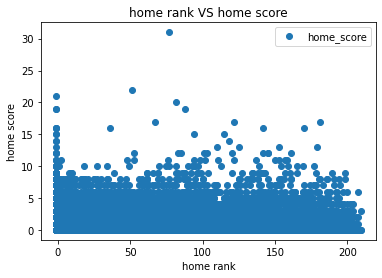

In [ ]:
#scatter plots for home score

results.plot(x='home_rank', y='home_score', style='o')
plt.title('home rank VS home score')
plt.xlabel('home rank')
plt.ylabel('home score')
plt.show()

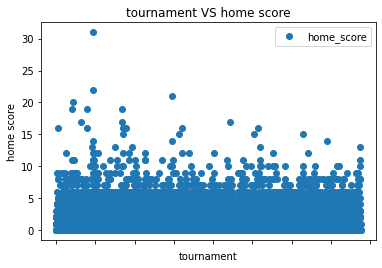

In [ ]:


results.plot(x='tournament', y='home_score', style='o')
plt.title('tournament VS home score')
plt.xlabel('tournament')
plt.ylabel('home score')
plt.show()

In [ ]:
results['tournament']

21003                COSAFA Cup
21004                  Friendly
21005                  Friendly
21006                  Friendly
21007                  Friendly
                  ...          
40834             Pacific Games
40835             Pacific Games
40836    African Cup of Nations
40837      Intercontinental Cup
40838             Pacific Games
Name: tournament, Length: 19383, dtype: category
Categories (109, object): [ABCS Tournament, AFC Asian Cup, AFC Asian Cup qualification,
                           AFC Challenge Cup, ..., WAFF Championship, West African Cup,
                           Windward Islands Tournament, World Unity Cup]

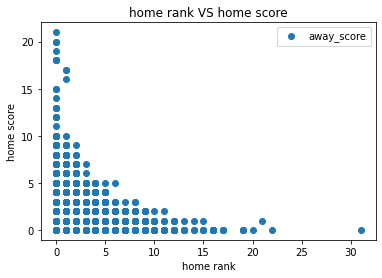

In [ ]:
results.plot(x='home_score', y='away_score', style='o')
plt.title('home rank VS home score')
plt.xlabel('home rank')
plt.ylabel('home score')
plt.show()

In [ ]:
# Ditribution plot for gender
sns.distplot(results['home_score']) 

### 5) Modelling

**Multicollinearity**

In [ ]:
#multicollinearity(when independent vars are highly correlated with each other)
#the independent variabres are home rank, away rank, tournament

In [418]:
#encoding categorical vars ie tournament
#use label encoder

le = LabelEncoder()
results['tournament'] = le.fit_transform(results['tournament'])
results.head()

,date,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank
21003,1998-10-01,Malawi,Zambia,0,1,18,89,23
21004,1998-10-01,Eswatini,Botswana,1,1,31,-1,155
21005,1998-11-01,Burkina Faso,Mali,0,0,31,72,54
21006,1998-11-01,Togo,Mozambique,1,2,31,71,76
21007,1998-12-01,Lesotho,Botswana,0,0,31,137,156


In [419]:
results['tournament']

21003    18
21004    31
21005    31
21006    31
21007    31
         ..
40834    53
40835    53
40836     7
40837    36
40838    53
Name: tournament, Length: 19383, dtype: int64

In [420]:
#plot correlation matrix of all independent variables
#use heatmap

corr=results.drop('home_score', axis=1).corr()
corr.style.background_gradient(cmap='coolwarm')

,away_score,tournament,home_rank,away_rank
away_score,1.000000,0.027287,0.131861,-0.142342
tournament,0.027287,1.000000,-0.111108,-0.111361
home_rank,0.131861,-0.111108,1.000000,0.346140
away_rank,-0.142342,-0.111361,0.346140,1.000000


*the variables are highly correlated, however the collinearity are not severe as they are not greater than 0.The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself*

In [421]:
#using VIF
#Compute VIF data for each independent variable

results_df = results[['away_score', 'home_rank', 'away_rank', 'tournament']]

vif = pd.DataFrame()
vif["features"] = results_df.columns
vif["vif_Factor"] = [variance_inflation_factor(results_df.values, i) for i in range(results_df.shape[1])]
vif 

,features,vif_Factor
0,away_score,1.645233
1,home_rank,2.815709
2,away_rank,2.598496
3,tournament,2.321065


*the factors are not strongly correlated as their values are not greater than 10*

*the vif score for away_score is 1.64, home rank is 2.81, away rank is 2.59, tournament is 2.32*

In [443]:
#building models
#logistic reg
#home score

X = results['home_rank'].values.reshape(-1, 1) #independent vars
y = results['home_score'].values  #dependent vars

#use 20% of data to test
#split into train and test set

rank_train, rank_test, score_train, score_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [444]:
#creating a regressor object

regressor = LinearRegression()

regressor.fit(rank_train, score_train)

#the intercept
print(regressor.intercept_)

#the coefficient
print(regressor.coef_)

1.8857915167295305
[-0.0034526]


In [445]:
#actual and predicted values
home_score_predict = regressor.predict(rank_test)

comparison_frame = pd.DataFrame({'Actual': rank_test.flatten(), 'Predicted': home_score_predict.flatten()})
comparison_frame.describe()

,Actual,Predicted
count,3877.000000,3877.000000
mean,69.230591,1.646766
std,55.261046,0.190794
min,-1.000000,1.164198
25%,20.000000,1.509458
50%,63.000000,1.668278
75%,109.000000,1.816739
max,209.000000,1.889244


In [452]:
from sklearn import metrics

#Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(score_test, home_score_predict))

#Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(score_test, home_score_predict))  

#RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(score_test, home_score_predict)))  


Mean Absolute Error: 1.20768696570327
Mean Squared Error: 3.0471936998169844
Root Mean Squared Error: 1.7456212933557451


*the RMSE is 1.74*

**Polynomial Regression**

In [426]:
#creating polynomial regression-home score
#drop date , teams as they are not encoded
#making it easier to use dummy data

results.drop(['date', 'home_team', 'away_team'], axis=1, inplace=True)
results.head(1)

,home_score,away_score,tournament,home_rank,away_rank
21003,0,1,18,89,23


In [366]:
#Get the dependent and independent variables

X = results[['tournament', 'away_score', 'home_rank', 'away_rank']].values #independent
y = results['home_score'].values #dependent

In [367]:
#splitting the dataset into training and test sets
#20% for testing 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [368]:
# Fit polynomial Regression to the dataset

reg_line = LinearRegression()
reg_line.fit(X,y)

poly_reg = PolynomialFeatures(degree = 1) 
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [369]:
#defining a function which will transform the original features into polynomial features 
#of a given degree and then apply Linear Regression on it.

def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree) 
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
   # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
   # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
   # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)
  
   # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("********************************************")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("****************************************")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

create_polynomial_regression_model(2) #degree of freedom 2

The model performance for the training set
********************************************
RMSE of training set is 1.587340671764775
R2 score of training set is 0.1303506237625237


The model performance for the test set
****************************************
RMSE of test set is 1.6202509920063684
R2 score of test set is 0.143883096877374


*the train set is 1.58 and r^2 is 0.13.using linear regression the RMSE is 1.74 and r^2 is 0.0062. from this, we notice that there is a decrease in RMSE while there is an increase in r2 from the two. this means our model is better when we use polynomial reg*

*cross validation*

In [472]:
#no. of folds
folds = KFold(n_splits=10)
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

RMSES = [] # keep track of the RSME of each model
count = 1
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))

we are using 10 folds

Training model 1

Training model 1

Training model 1

Training model 1

Training model 1

Training model 1

Training model 1

Training model 1

Training model 1

Training model 1


In [474]:
# set up the train and test based on the split determined by KFold
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

# fitting the model 
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
  
#accuraccy of the model
y_pred = regressor.predict(X_test)
  
rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
RMSES.append(rmse_value)
  
print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
count = count + 1

Model 2 Root Mean Squared Error: 1.6087935743511104


**Logistic regression**

In [428]:
#get win, loss, draw
#subtract away score from home score
#create the new column

results['fscore']= results.away_score - results.home_score
def result(fscore):
  if fscore > 0:
    return 'win'
  elif fscore < 0:
    return 'lose'
  else:
    return 'draw'
results['wld'] = results.fscore.apply(lambda x: result(x))

results.head()

,home_score,away_score,tournament,home_rank,away_rank,fscore,wld
21003,0,1,18,89,23,1,win
21004,1,1,31,-1,155,0,draw
21005,0,0,31,72,54,0,draw
21006,1,2,31,71,76,1,win
21007,0,0,31,137,156,0,draw


In [ ]:
#changing the win, loss and draw into dummy data
wld = pd.get_dummies(results['wld'],drop_first=True)

In [435]:
#the dependent var is wld
#splitting the dataset
X = results.drop('wld', axis=1,)
y = results['wld']

#test at 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=25)

# Fitting our model

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [441]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

#calculate accuracy 

accuracy_score(y_test, y_pred)

1.0

In [492]:
df=pd.read_csv('fifa_ranking.csv')
df.head(2)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,08/08/1993
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,08/08/1993


In [493]:
df1=pd.read_csv('results.csv')
df1.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False


In [ ]:
df.rank_date = pd.to_datetime(df.rank_date)
df1.date = pd.to_datetime(df1.date)

#reviewing the dtypes

print(df.dtypes)
print(df1.dtypes)

In [500]:
#results
sns.barplot(x= 'home_team', y = 'home_score', data = df1, hue='tournament')

TypeError: ignored